In [3]:
import numpy as np
import torch
import json

# # Example trajectories
# trajectories = [
#     [
#         ([50, 950], [950, 50], (4, 2), 50, [150, 950], [950, 150], False),
#         ([150, 950], [950, 150], (4, 2), 30, [250, 950], [950, 250], False),
#         ([250, 950], [950, 250], (0, 3), 0, [250, 950], [850, 250], False),
#         ([250, 950], [850, 250], (1, 1), 20, [250, 850], [850, 150], False),
#         ([250, 850], [850, 150], (0, 4), 0, [250, 850], [950, 150], False),
#         ([250, 850], [950, 150], (1, 1), 20, [250, 750], [950, 50], False),
#         ([250, 750], [950, 50], (4, 1), -100, [350, 750], [950, 50], False),
#         ([350, 750], [950, 50], (1, 1), -80, [350, 650], [950, 50], False),
#         ([350, 650], [950, 50], (4, 0), 10, [450, 650], [950, 50], False),
#         ([450, 650], [950, 50], (4, 2), 30, [550, 650], [950, 150], False),
#         ([550, 650], [950, 150], (2, 4), -70, [550, 750], [950, 150], False),
#         ([550, 750], [950, 150], (0, 3), 0, [550, 750], [850, 150], False),
        
#         # Add more steps...
#     ],[
#         ([50, 950], [950, 50], (4, 2), 50, [150, 950], [950, 150], False),
#         ([150, 950], [950, 150], (4, 2), 30, [250, 950], [950, 250], False),
#         ([250, 950], [950, 250], (0, 3), 0, [250, 950], [850, 250], False),
#         ([250, 950], [850, 250], (1, 1), 20, [250, 850], [850, 150], False),
#         ([250, 850], [850, 150], (0, 4), 0, [250, 850], [950, 150], False),
#         ([250, 850], [950, 150], (1, 1), 20, [250, 750], [950, 50], False),
#         ([250, 750], [950, 50], (4, 1), -100, [350, 750], [950, 50], False),
#         ([350, 750], [950, 50], (1, 1), -80, [350, 650], [950, 50], False),
#         ([350, 650], [950, 50], (4, 0), 10, [450, 650], [950, 50], False),
#         ([450, 650], [950, 50], (4, 2), 30, [550, 650], [950, 150], False),
#         ([550, 650], [950, 150], (2, 4), -70, [550, 750], [950, 150], False),
#         ([550, 750], [950, 150], (0, 3), 0, [550, 750], [850, 150], False),
#     ]
#     # Add more trajectories...
# ]
# # Let's read the content of the 'data.txt' file and store it in a variable.
# # with open('data_1.json', 'r') as file:
# #     json_data = json.load(file)

with open('Final.json', 'r') as file:
    data = json.load(file)
aaa= []
for i in range(7000):
    b = []
    for j in range(199):
        b.append(tuple(data[i][j]))
    aaa.append(b)


trajectories = aaa




def preprocess_trajectories(trajectories):
    returns, states, actions, timesteps = [], [], [], []
    for traj in trajectories:
        traj_returns = []
        traj_states = []
        traj_actions = []
        traj_timesteps = []
        for t, step in enumerate(traj):
            state_uav1, state_uav2, action, reward, next_state_uav1, next_state_uav2, done = step
            state = state_uav1 + state_uav2
            traj_returns.append(reward)
            traj_states.append(state)
            traj_actions.append(list(action))
            traj_timesteps.append(t)  # Generate timesteps as a sequence of integers
        returns.append(traj_returns)
        states.append(traj_states)
        actions.append(traj_actions)
        timesteps.append(traj_timesteps)
    return np.array(returns), np.array(states), np.array(actions), np.array(timesteps)

returns, states, actions, timesteps = preprocess_trajectories(trajectories)

# Convert to PyTorch tensors
returns_tensor = torch.tensor(returns, dtype=torch.float32)
states_tensor = torch.tensor(states, dtype=torch.float32)
actions_tensor = torch.tensor(actions, dtype=torch.float32)
timesteps_tensor = torch.tensor(timesteps, dtype=torch.float32)

print(returns_tensor.shape)  # Expected: (num_trajectories, num_steps)
print(states_tensor.shape)  # Expected: (num_trajectories, num_steps, state_dim)
print(actions_tensor.shape)  # Expected: (num_trajectories, num_steps, action_dim)
print(timesteps_tensor.shape)  # Expected: (num_trajectories, num_steps)


torch.Size([7000, 199])
torch.Size([7000, 199, 4])
torch.Size([7000, 199, 2])
torch.Size([7000, 199])


Epoch 1/100, Loss: 346.8024, Accuracy: 0.0288
Epoch 2/100, Loss: 25.2977, Accuracy: 0.6111
Epoch 3/100, Loss: 11.5829, Accuracy: 0.6428
Epoch 4/100, Loss: 7.7223, Accuracy: 0.6408
Epoch 5/100, Loss: 5.5728, Accuracy: 0.6483
Epoch 6/100, Loss: 4.1523, Accuracy: 0.6483
Epoch 7/100, Loss: 3.3127, Accuracy: 0.6484
Epoch 8/100, Loss: 2.7764, Accuracy: 0.6484
Epoch 9/100, Loss: 2.4205, Accuracy: 0.6485
Epoch 10/100, Loss: 2.1668, Accuracy: 0.6485
Epoch 11/100, Loss: 1.9748, Accuracy: 0.6486
Epoch 12/100, Loss: 1.8221, Accuracy: 0.6486
Epoch 13/100, Loss: 1.6935, Accuracy: 0.6487
Epoch 14/100, Loss: 1.5816, Accuracy: 0.6487
Epoch 15/100, Loss: 1.4831, Accuracy: 0.6487
Epoch 16/100, Loss: 1.3956, Accuracy: 0.6488
Epoch 17/100, Loss: 1.3147, Accuracy: 0.6488
Epoch 18/100, Loss: 1.2383, Accuracy: 0.6489
Epoch 19/100, Loss: 1.1691, Accuracy: 0.6490
Epoch 20/100, Loss: 1.0972, Accuracy: 0.6490
Epoch 21/100, Loss: 1.0299, Accuracy: 0.6490
Epoch 22/100, Loss: 0.9727, Accuracy: 0.6491
Epoch 23/100, L

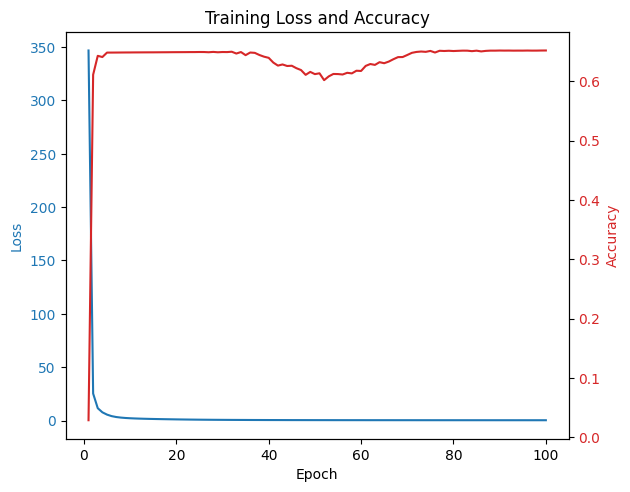

In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt

# Sample tensors (replace these with your actual tensors)
# returns_tensor = torch.randn(7000, 199)  # Example shape
# states_tensor = torch.randn(7000, 199, 4)   # Example shape
# actions_tensor = torch.randint(0, 10, (7000, 199, 2))  # Example shape
# timesteps_tensor = torch.randn(7000, 199) # Example shape

# Create a DataLoader for batching
dataset = TensorDataset(returns_tensor, states_tensor, actions_tensor, timesteps_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a sample DecisionTransformer model (replace with your actual model)
class DecisionTransformer(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim):
        super(DecisionTransformer, self).__init__()
        self.fc1 = nn.Linear(state_dim + 1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, action_dim)
    
    def forward(self, R, s, a, t):
        # Example forward method, modify as per your actual model
        seq_len = s.shape[1]
        x = torch.cat((s, t.unsqueeze(-1)), dim=-1)  # Concatenate state and timestep
        x = x.view(-1, x.shape[-1])  # Flatten for linear layer
        x = torch.relu(self.fc1(x))
        a_pred = self.fc2(x)
        a_pred = a_pred.view(-1, seq_len, a_pred.shape[-1])  # Reshape back to (batch_size, seq_len, action_dim)
        return a_pred

model = DecisionTransformer(state_dim=4, action_dim=2, hidden_dim=128)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

num_epochs = 100
losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_correct = 0
    epoch_total = 0

    for R_batch, s_batch, a_batch, t_batch in dataloader:
        # Debug statements to check tensor shapes
        # print(f'R_batch shape: {R_batch.shape}')
        # print(f's_batch shape: {s_batch.shape}')
        # print(f'a_batch shape: {a_batch.shape}')
        # print(f't_batch shape: {t_batch.shape}')
        
        optimizer.zero_grad()
        a_preds = model(R_batch, s_batch, a_batch, t_batch)
        loss = loss_fn(a_preds, a_batch)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item() * R_batch.size(0)

        # Accuracy calculation (example using a threshold)
        correct = (torch.abs(a_preds - a_batch) < 0.1).all(dim=-1).sum().item()
        epoch_correct += correct
        epoch_total += R_batch.size(0) * R_batch.size(1)

    avg_loss = epoch_loss / len(dataset)
    accuracy = epoch_correct / epoch_total

    losses.append(avg_loss)
    accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plotting the training loss and accuracy
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, num_epochs + 1), losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1, num_epochs + 1), accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training Loss and Accuracy')
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import GPT2Model, GPT2Config

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DecisionTransformer(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim, max_length=199):
        super(DecisionTransformer, self).__init__()
        config = GPT2Config(vocab_size=1, n_positions=max_length * 3, n_embd=hidden_dim, n_layer=4, n_head=8)
        self.transformer = GPT2Model(config)
        
        # Embedding layers
        self.state_emb = nn.Linear(state_dim, hidden_dim)
        self.action_emb = nn.Linear(action_dim, hidden_dim)
        self.reward_emb = nn.Linear(1, hidden_dim)
        
        self.predict_action = nn.Linear(hidden_dim, action_dim)
        
        # Positional encoding
        self.positional_encoding = nn.Parameter(self._init_positional_encoding(max_length * 3, hidden_dim), requires_grad=False)
        
    def _init_positional_encoding(self, max_length, hidden_dim):
        position = torch.arange(max_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, hidden_dim, 2) * -(torch.log(torch.tensor(10000.0)) / hidden_dim))
        positional_encoding = torch.zeros(max_length, hidden_dim)
        positional_encoding[:, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 1::2] = torch.cos(position * div_term)
        return positional_encoding
    
    def forward(self, returns, states, actions):
        batch_size, seq_length = states.size(0), states.size(1)
        pos_embedding = self.positional_encoding[:seq_length * 3, :].unsqueeze(0).expand(batch_size, -1, -1)
        
        s_embedding = self.state_emb(states)
        a_embedding = self.action_emb(actions)
        R_embedding = self.reward_emb(returns.unsqueeze(-1))
        
        # Interleave tokens as (R_1, s_1, a_1, ..., R_K, s_K, a_K)
        input_embeds = torch.cat([R_embedding, s_embedding, a_embedding], dim=1).view(batch_size, -1, s_embedding.size(-1))
        
        # Add positional embeddings
        input_embeds += pos_embedding
        
        # Use transformer to get hidden states
        transformer_outputs = self.transformer(inputs_embeds=input_embeds)
        hidden_states = transformer_outputs.last_hidden_state
        
        # Select hidden states for action prediction tokens
        a_hidden = hidden_states[:, 2::3]  # Assuming the actions are at these positions

        # Predict action
        return self.predict_action(a_hidden)

# Define the model, optimizer, and loss function
model = DecisionTransformer(state_dim=4, action_dim=2, hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()



# Create a DataLoader for batching
dataset = TensorDataset(returns_tensor, states_tensor, actions_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

# Training loop with accuracy and loss tracking
num_epochs = 100
best_loss = float('inf')
early_stop_count = 0
patience = 10  # Number of epochs to wait for improvement before stopping

# Enable mixed precision training
scaler = torch.cuda.amp.GradScaler()

for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_correct = 0
    epoch_total = 0

    for R_batch, s_batch, a_batch in dataloader:
        R_batch, s_batch, a_batch = R_batch.to(device), s_batch.to(device), a_batch.to(device)

        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            a_preds = model(R_batch, s_batch, a_batch)
            loss = loss_fn(a_preds, a_batch)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        epoch_loss += loss.item() * R_batch.size(0)
        
        # Accuracy calculation (example using a threshold)
        correct = (torch.abs(a_preds - a_batch) < 0.1).all(dim=-1).sum().item()
        epoch_correct += correct
        epoch_total += R_batch.size(0) * R_batch.size(1)
        
    avg_loss = epoch_loss / len(dataset)
    accuracy = epoch_correct / epoch_total

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss*100:.4f}, Accuracy: {accuracy*100:.4f}')
    
    # Early stopping logic
    if avg_loss < best_loss:
        best_loss = avg_loss
        early_stop_count = 0
    else:
        early_stop_count += 1
        if early_stop_count >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

Epoch 1/100, Loss: 126.8030, Accuracy: 6.4131
Epoch 2/100, Loss: 98.0872, Accuracy: 20.2681
Epoch 3/100, Loss: 90.7951, Accuracy: 29.1842
Epoch 4/100, Loss: 83.0997, Accuracy: 39.3794
Epoch 5/100, Loss: 79.5056, Accuracy: 44.2603
Epoch 6/100, Loss: 77.6843, Accuracy: 46.4160
Epoch 7/100, Loss: 76.7430, Accuracy: 47.6426
Epoch 8/100, Loss: 75.9704, Accuracy: 48.3585
Epoch 9/100, Loss: 74.9409, Accuracy: 49.1513
Epoch 10/100, Loss: 73.8954, Accuracy: 50.7578
Epoch 11/100, Loss: 73.2224, Accuracy: 51.3594
Epoch 12/100, Loss: 72.6028, Accuracy: 51.9040
Epoch 13/100, Loss: 71.9322, Accuracy: 52.4264
Epoch 14/100, Loss: 71.8022, Accuracy: 52.6265
Epoch 15/100, Loss: 70.9928, Accuracy: 53.3886
Epoch 16/100, Loss: 70.5467, Accuracy: 53.8034
Epoch 17/100, Loss: 70.1871, Accuracy: 53.9576
Epoch 18/100, Loss: 69.7815, Accuracy: 54.3189
Epoch 19/100, Loss: 69.4179, Accuracy: 54.2426
Epoch 20/100, Loss: 68.9308, Accuracy: 54.7146
Epoch 21/100, Loss: 68.6980, Accuracy: 54.5032
Epoch 22/100, Loss: 68

In [ ]:
import matplotlib.pyplot as plt
# Visualization of the model's predictions
model.eval()
with torch.no_grad():
    R_batch, s_batch, a_batch = next(iter(dataloader))
    R_batch, s_batch, a_batch = R_batch.to(device), s_batch.to(device), a_batch.to(device)
    a_preds = model(R_batch, s_batch, a_batch)
# Convert continuous predictions to discrete values
predicted_actions = torch.round(a_preds).cpu().numpy()
true_actions = a_batch.cpu().numpy()

# Plotting the predicted vs true actions for the first trajectory in the batch
plt.figure(figsize=(10, 5))
plt.plot(predicted_actions[0, :, 0], label='Predicted Action 1', linestyle='--', color='b')
plt.plot(predicted_actions[0, :, 1], label='Predicted Action 2', linestyle='--', color='r')
plt.plot(true_actions[0, :, 0], label='True Action 1', color='b')
plt.plot(true_actions[0, :, 1], label='True Action 2', color='r')
plt.xlabel('Time Step')
plt.ylabel('Action Value')
plt.title('Predicted vs True Actions for the First Trajectory')
plt.legend()
plt.show()